In [1]:
# This notebook explores classification using the MNIST data set 
# supplied in scikit-learn.
import numpy as np

# Load the data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
# All of this data gets stored in your home directory. Take a peek...
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
# The 'data' key stores the data we use to train/test with one row per instance (x_n) and
# one column per feature/attribute. The 'target' key stores the labels.
X, y = mnist['data'], mnist['target']

In [4]:
# Examining the shapes...
X.shape # 784 pixels or a 28x28 image. Every pixel's intensity is a feature.

(70000, 784)

In [5]:
# First instance - each pixel ranges from 0->255. 
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
y[0] # A single digit classification, from 0->9

0.0

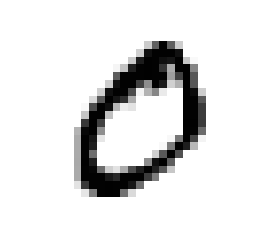

In [7]:
# We can display the feature array as an image using matplotlib.
# In this case, a 0 is displayed and its label (above) is indeed 0.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

first_digit = X[0]
first_digit_img = first_digit.reshape(28,28)

plt.imshow(first_digit_img, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [8]:
# Splitting the data into training and testing sets according to the book's guidance: 
# 60000 training samples, 10000 test samples
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [9]:
# Next shuffle up the data since it is all in order from 0 to 9
# Use the numpy permute function to create an array that is randomly populated
# with numbers from 0 to 59999

shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

## Binary Classification Task

In [10]:
# The task is to train a binary classifier that will map a provided test array (handwritten digit)
# into a single yes/no on whether it meets our chosen label: 3

# First, partition the training and test sets to only have the number 3
y_train_3 = (y_train == 3)
y_test_3 = (y_test==3)

# Let's grab a few instances from X_train to test after the fact.
some_idxs = np.random.choice( np.where(y_train == 3)[0], 10 )
some_instances = X_train[some_idxs]
some_labels = y_train_3[some_idxs]
print("Testing with the following instance indicies: " + str(some_idxs))

Testing with the following instance indicies: [31062  5140 36407 31352 52472 31804  2030 23612 11572 57887]


In [11]:
# Play with the StochasticGradientDescent classifier. It is good for online learning
# as it trains with one instance at a time, not the full set

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, tol=1e-3) # set random state for reproducible results
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [12]:
# Predicting for some training data. It should look pretty good for some instances, as this
# is all training data being used. But there are devils in the details.
for i in range(0,10):
    is_three = sgd_clf.predict([some_instances[i]])
    label = some_labels[i]
    print("Predicted: %r, Label: %r" % (is_three, label))

Predicted: array([ True]), Label: True
Predicted: array([ True]), Label: True
Predicted: array([ True]), Label: True
Predicted: array([ True]), Label: True
Predicted: array([False]), Label: True
Predicted: array([ True]), Label: True
Predicted: array([False]), Label: True
Predicted: array([False]), Label: True
Predicted: array([ True]), Label: True
Predicted: array([ True]), Label: True


In [13]:
# Pull up the cross validation score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.96050197, 0.9471    , 0.96944847])

In [14]:
# Not bad - but the author mentions that only 10% of the data is a 5! So just guessing wrong will work too...

from sklearn.base import BaseEstimator

class Not5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [15]:
not3_clf = Not5Classifier()
not3_clf.fit(X_train, y_train)
cross_val_score(not3_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8978 , 0.8986 , 0.89705])

## Classifier Metric Exploration

In [16]:
# Yikes! Still almost 90% accuracy. 
# Lesson learned: pay attention to your labels and what you are trying to classify.
# To better check a classifier, use a confusion matrix based on the cross validation predictions

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Compute the predictions for each fold.
y_train_pred = cross_val_predict( sgd_clf, X_train, y_train_3, cv=3 )
# Compute the confusion matrix using the predictions and labels.
#   First row - "Not 3"; Second row - "3"
#   First column - "Predicted Not 3"; Second column - "Predicted 3"
confusion_matrix(y_train_3, y_train_pred)

array([[52525,  1344],
       [ 1115,  5016]])

In [17]:
# Precision and recall are good metrics that can be computed with sklearn.
# Precision is the ratio of true positives to total positives.
# Recall is the ratio of true positives to sum of true positives and false negatives.

from sklearn.metrics import precision_score, recall_score, f1_score

# The precision results show that when the classifier claims a digit is a 3, it is correct ~82% of the time.
# The recall results show that the SGD classifier can pick out 3's only ~72% of the time.
print("Precision: " + str(precision_score(y_train_3, y_train_pred)))
print("Recall: " + str(recall_score(y_train_3, y_train_pred)))
print("F1: " + str(f1_score(y_train_3, y_train_pred)))

Precision: 0.7886792452830189
Recall: 0.8181373348556517
F1: 0.8031382595468737


In [18]:
# There is a tradeoff between recall and precision. In this case, we can compute curves of the precision
# and recall based on the SGD's threshold variation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

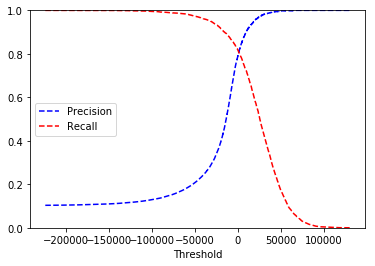

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

# We use the plot to select the best threshold based on the desired precision/recall tradeoff needed
# for the task.
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

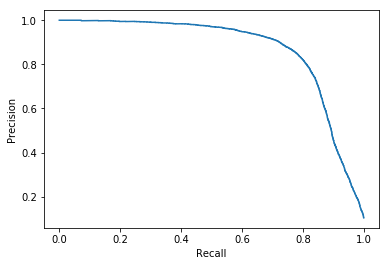

In [21]:
# Plot of precision vs. recall
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [22]:
# ROC curves illustrate the tradeoff between recall and producing false positives.
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

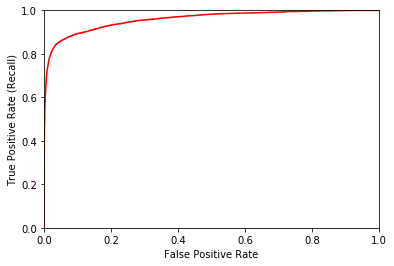

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, "r", label=label)
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

# As recall goes up, the false positive rate will also increase. This is another tradeoff to consider.
# The area under the curve is used to compare classifiers. 
# A totally random classifier would have a curve of slope 1.
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
# Let's build a RandomForestClassifier for comparison
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(rf_clf, X_train, y_train_3, cv=3, method="predict_proba")

In [25]:
# Normalize around the probability as a score to compare both classifiers
y_scores_forest = y_probs_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

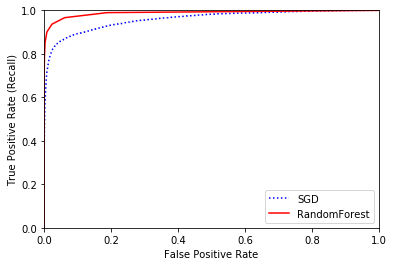

In [26]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc="lower right")
plt.show()

In [27]:
# RandomForest is overall better than SGD for this task
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores_forest)

0.9885536246207919

## Multiclass Classification Tasks

In [28]:
# Not all learning algorithms can handle multiple classes. One strategy is to train N binary classifiers,
# like the one for 3 above, and choose the best performing one.
# In fact, sklearn will perform this operation automatically!

sgd_clf.fit(X_train, y_train) # This is the whole target set with 10 labels.

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [29]:
sgd_clf.predict([first_digit])

array([0.])

In [30]:
# Looking at the scores to ensure we are getting 10...
first_digit_scores = sgd_clf.decision_function([first_digit])
print(str( np.argmax(first_digit_scores) ))

0


In [31]:
# And here are the classes for this classifier:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
# The One vs. All strategy is the default in sklearn. We can build a One vs. One in the following way:
from sklearn.multiclass import OneVsOneClassifier

# Build it by passing the constructor of the binary classifier.
onevone_clf = OneVsOneClassifier( SGDClassifier(random_state=42, tol=2e-3) )
onevone_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.002, verbose=0, warm_start=False),
          n_jobs=1)

In [33]:
onevone_clf.predict([first_digit])

array([0.])

In [34]:
len(onevone_clf.estimators_) # N(N-1) / 2 total estimators generated

45

In [35]:
# The RandomForest classifier is and algorithm that handles multiple classes without invoking the
# extra layers above

rf_clf.fit(X_train, y_train)
print(str(rf_clf.predict([first_digit])))
print( "Probability scores: " + str(rf_clf.predict_proba([first_digit])) )

[0.]
Probability scores: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [36]:
# Cross validate each to see how they do

sgd_cv_score = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

print("SGD CV accuracy = " + str(sgd_cv_score) + "\nRandomForest CV accuracy = " + str(rf_cv_score))

SGD CV accuracy = [0.87282543 0.87874394 0.87163074]
RandomForest CV accuracy = [0.93936213 0.94144707 0.94459169]


In [37]:
# Scaling the data before hand can improve performance
# Use StandardScaler - it centers features around 0 and with a variance of 1
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype(np.float64))

# Re-CV the classifiers
sgd_cv_scaled_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
rf_cv_scaled_score = cross_val_score(rf_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

print("SGD CV accuracy = " + str(sgd_cv_scaled_score) + "\nRandomForest CV accuracy = " + str(rf_cv_scaled_score))

SGD CV accuracy = [0.89947011 0.90099505 0.9073361 ]
RandomForest CV accuracy = [0.93941212 0.94149707 0.94454168]


In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)

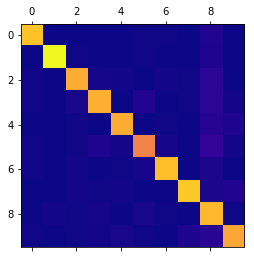

In [39]:
plt.matshow(conf_matrix, cmap=plt.cm.plasma)
plt.show() # In the plot, 5 has the lowest performance - or most error in classification

In [40]:
# Normalize the confusion matrix
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

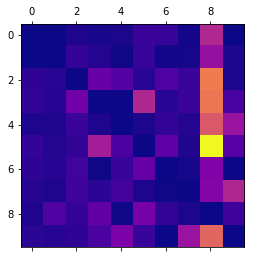

In [41]:
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.plasma)
plt.show()

In [42]:
# *** Copied from the chapter's notebook on github.
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

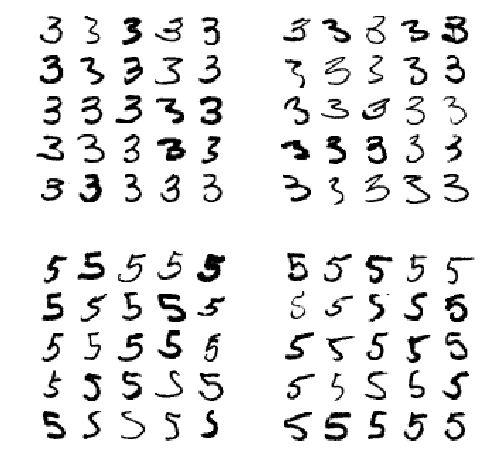

In [43]:
# We get more detail about the errors from this plot. 
# It looks like 8s and 9s get misclassified a lot. In fact, 3s and 5s get predicted as 8s frequently!
class_a, class_b = 3, 5
X_aa = X_train[ (y_train == class_a) & (y_train_pred == class_a) ]
X_ab = X_train[ (y_train == class_a) & (y_train_pred == class_b) ] # 3s confused as 5s
X_ba = X_train[ (y_train == class_b) & (y_train_pred == class_a) ] # 5s confused as 3s
X_bb = X_train[ (y_train == class_b) & (y_train_pred == class_b) ]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) # Top left
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) # Bottom left
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) # Top right
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) # Bottom right
plt.show()


## Outro

In [44]:
# It is possible to perform multilabel classification and multioutput classification
# using several scikit learn algorithsm.
# 1. Multilabel classification - output multiple binary labels
# 2. Multioutput classification - generalization of multilabel where each label can be a multiclass

from sklearn.neighbors import KNeighborsClassifier

# Create a couple new labels:
y_train_small = (y_train < 5)
y_train_even = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_small, y_train_even] # concatenates along second axis

In [45]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_clf.predict([first_digit])

array([[ True,  True]])

In [47]:
# So how does it do in general?
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=2)

In [48]:
f1_score( y_multilabel, y_train_knn_pred, average="macro" )

0.9798168467425783

In [ ]:
# Example of multioutput classification: removing noise from an image.
# Input = noisy image
# Output = clean image
# Why multilabel? one label per pixel; each label can have one of 0 -> 255 discrete values.

# fuzz up some MNIST

